In [ ]:
# mount the drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

np.set_printoptions(suppress=True)

In [ ]:
# references (for cool visualization) :
# https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb 

housing_dataset_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(housing_dataset_train)

housing_dataset_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
print(housing_dataset_test)

       longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]
      longitude  latitude  ...  median_income  median_house_value
0       -122.05     37.37  ...         6.6085            344700.0
1       -118.30     34.26  ...        

In [ ]:
# train head 
housing_dataset_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


'\ncombination = np.hstack((data, np.expand_dims(target, axis=1)))\ncombination_header = np.hstack((feature_name, target_name))\n\nplt.figure(figsize=(15, 15))\n\nfor i in range(combination.shape[1]):\n    variable = combination[:, i]\n    plt.subplot(3, 3, i+1)\n    plt.hist(variable, bins=50)\n    plt.grid()\n    plt.title(combination_header[i])\n'

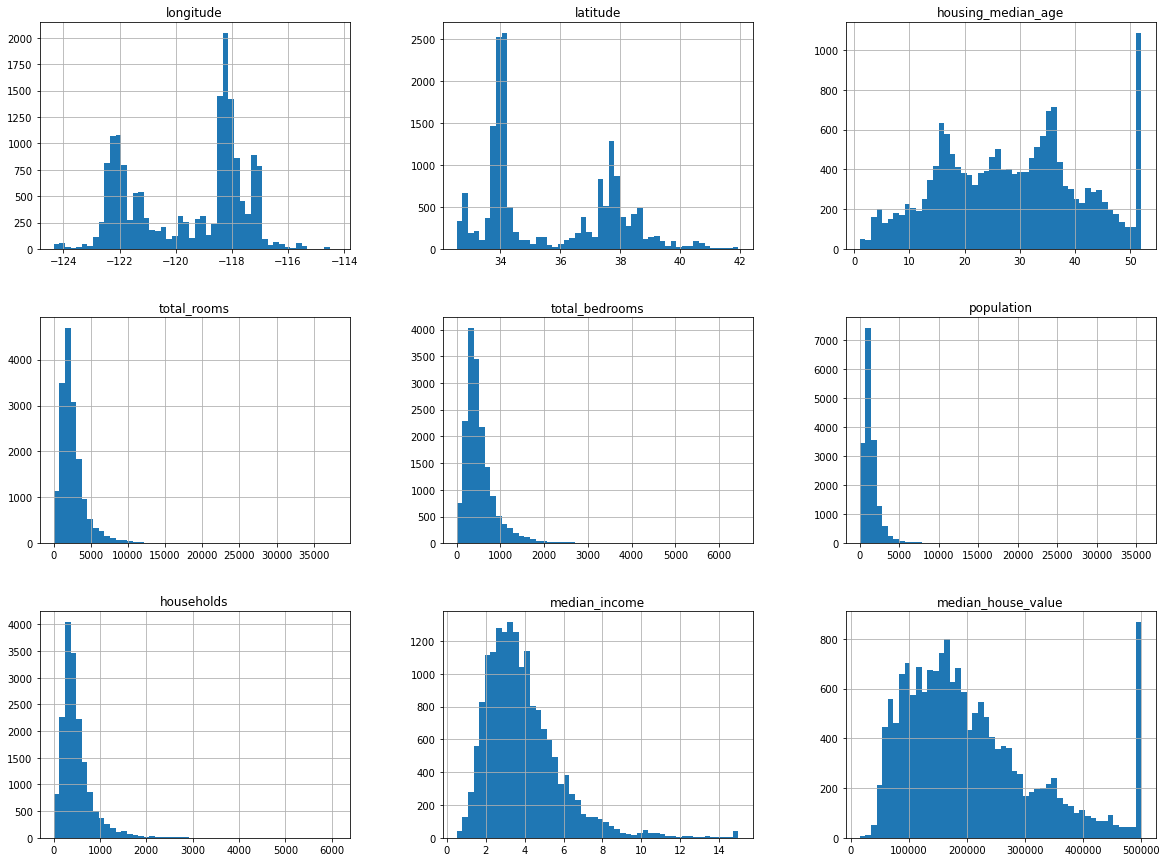

In [ ]:
# plot histograms for train data 
housing_dataset_train.hist(bins=50, figsize=(20, 15))

In [ ]:
california = plt.imread('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/california.png')

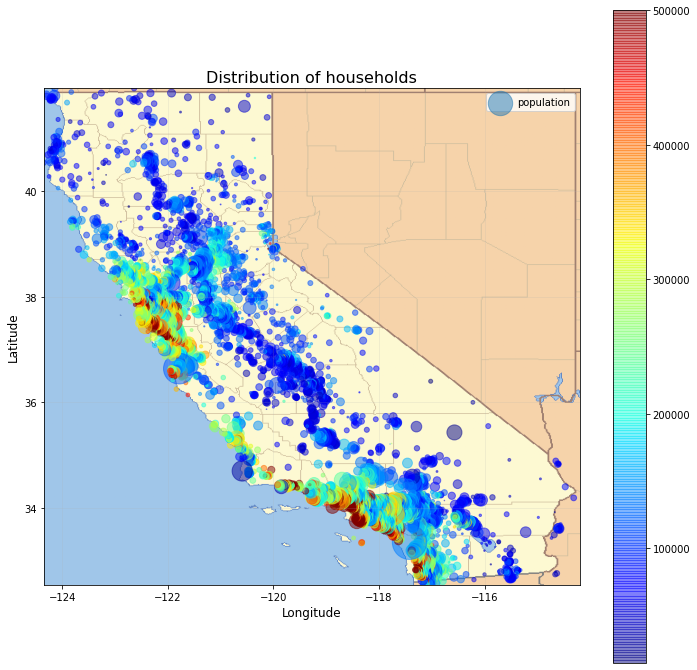

In [ ]:
# train data visualization

plt.figure(figsize=(12,12))
california = plt.imread('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/california.png')
plt.imshow(california,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing_dataset_train['longitude'],
            y=housing_dataset_train['latitude'], 
            alpha=0.5,
            s=housing_dataset_train['population']/30,
            c=housing_dataset_train['median_house_value'],
            cmap=plt.get_cmap("jet"),
            zorder=1,
            label='population')

plt.colorbar()
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)
plt.grid(alpha=0.2)
plt.title("Distribution of households",size=16)
plt.legend()
plt.savefig('/content/california_pretty.pdf')

In [ ]:
# converting the dataframes into np array to be used for model training

train_data_df = housing_dataset_train.iloc[:, 0:-1]
train_label_df = housing_dataset_train.iloc[:, -1]

train_data = train_data_df.to_numpy()
train_label = train_label_df.to_numpy() 

val_and_test_data_df = housing_dataset_test.iloc[:, 0:-1]
val_and_test_label_df = housing_dataset_test.iloc[:, -1]

val_and_test_data = val_and_test_data_df.to_numpy() 
val_and_test_label = val_and_test_label_df.to_numpy() 

val_data, test_data, val_label, test_label = train_test_split(val_and_test_data, val_and_test_label, test_size=0.5)


#val_data, test_data, val_labels, test_labels = train_test_split(x_test_combined, y_test_combined, test_size=0.5)

print('train data shape : ', train_data.shape)
print('train label shape : ', train_label.shape)

print('val data shape : ', val_data.shape)
print('val label shape : ', val_label.shape)

print('test data shape : ', test_data.shape)
print('test label shape : ', test_label.shape) 

#https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

train data shape :  (17000, 8)
train label shape :  (17000,)
val data shape :  (1500, 8)
val label shape :  (1500,)
test data shape :  (1500, 8)
test label shape :  (1500,)


In [ ]:
plt.hist(housing_dataset['longitude'], bins=50, figsize=(15,15))
plt.show()

KeyError: ignored

In [ ]:

# UNCOMMENT WHEN USING COLAB CSV
#plotting the correlation heatmap 

train_file = '/content/sample_data/california_housing_train.csv'
test_file = '/content/sample_data/california_housing_test.csv'

train = pd.read_csv(train_file)
test_combined = pd.read_csv(test_file)

val, test = train_test_split(test_combined, test_size=0.5)


train_labels = train[target]
val_labels = val[target]
test_labels = test[target] 

train_data = train.drop(target, 1)
print(train_data.shape)
val_data = val.drop(target, 1)
test_data = test.drop(target, 1)

C_mat_train = train_data.corr()
C_mat_val = val_data.corr() 
C_mat_test = test_data.corr()

fig = plt.figure(figsize = (30, 8))

plt.subplot(131)
plt.title('correlation matrix for train')
sns.heatmap(C_mat_train, square = True, annot=True)

plt.subplot(132)
plt.title('correlation matrix for val')
sns.heatmap(C_mat_val, square = True, annot=True)

plt.subplot(133)
plt.title('correlation matrix for test')
sns.heatmap(C_mat_test, square = True, annot=True)
plt.show()


NameError: ignored

In [ ]:
#sns.pairplot(train[column_names], diag_kind='kde')

In [ ]:
#sns.pairplot(val[column_names], diag_kind='kde')

In [ ]:
#sns.pairplot(test[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']], diag_kind='kde')

In [ ]:
#train.describe().transpose()[['mean', 'std']]

In [ ]:
#val.describe().transpose()[['mean', 'std']]

In [ ]:
#test.describe().transpose()[['mean', 'std']]

In [ ]:
'''
#feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]
#target_names = ["MedHouseVal"]

normalized = MinMaxScaler() 
#scaler = StandardScaler()

train = pd.DataFrame(normalized.fit_transform(train_data), columns=column_names)
#train_labels = pd.DataFrame(normalized.fit_transform(train_labels), columns=target) 

val = pd.DataFrame(normalized.fit_transform(val_data), columns=column_names)
#val_labels = pd.DataFrame(normalized.fit_transform(val_labels), columns=target) 

test = pd.DataFrame(normalized.fit_transform(test_data), columns=column_names)
#test_labels = pd.DataFrame(normalized.fit_transform(test_labels), columns=target) 

#train = pd.DataFrame(scaler.fit_transform(train_data), columns=column_names)
#train_labels = pd.DataFrame(scaler.fit_transform(train_labels), columns=target) 

#val = pd.DataFrame(scaler.fit_transform(val_data), columns=column_names)
#val_labels = pd.DataFrame(scaler.fit_transform(val_labels), columns=target) 

#test = pd.DataFrame(scaler.fit_transform(test_data), columns=column_names)
#test_labels = pd.DataFrame(scaler.fit_transform(test_labels), columns=target) 

#print(train.columns)
x_train = train_data
y_train = train_label

x_validation = val_data
y_validation = val_label

x_test = test_data
y_test = test_label

#x_train = np.array(train_data)
#y_train = np.array(train_labels)

#x_validation = np.array(val_data)
#y_validation = np.array(val_labels)

#x_test = np.array(test_data)
#y_test = np.array(test_labels)

print('dimensions of x_train ', x_train.shape)
print('dimensions of x_validation ', x_validation.shape)
print('dimensions of x_test ', x_test.shape)

print('dimensions of y_train ', y_train.shape)
print('dimensions of y_validation ', y_validation.shape)
print('dimensions of y_test ', y_test.shape)
'''

'\n#feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]\n#target_names = ["MedHouseVal"]\n\nnormalized = MinMaxScaler() \n#scaler = StandardScaler()\n\ntrain = pd.DataFrame(normalized.fit_transform(train_data), columns=column_names)\n#train_labels = pd.DataFrame(normalized.fit_transform(train_labels), columns=target) \n\nval = pd.DataFrame(normalized.fit_transform(val_data), columns=column_names)\n#val_labels = pd.DataFrame(normalized.fit_transform(val_labels), columns=target) \n\ntest = pd.DataFrame(normalized.fit_transform(test_data), columns=column_names)\n#test_labels = pd.DataFrame(normalized.fit_transform(test_labels), columns=target) \n\n#train = pd.DataFrame(scaler.fit_transform(train_data), columns=column_names)\n#train_labels = pd.DataFrame(scaler.fit_transform(train_labels), columns=target) \n\n#val = pd.DataFrame(scaler.fit_transform(val_data), columns=column_names)\n#val_labels = pd.DataFrame(scaler.fit_transfo

In [ ]:
#test_index = np.random.randint(x_test.shape[0])

#print('Before normalization\n')
#print(x_train[0])
#print(y_train[0])

#print(x_validation[0])
#print(y_validation[0])

#print(x_test[0])
#print(y_test[0])

#y_train = np.reshape(y_train, (-1, 1))
#y_validation = np.reshape(y_validation, (-1, 1))
#y_test = np.reshape(y_test, (-1, 1))

#scaler = StandardScaler()

#x_train_normalized = scaler.fit_transform(x_train)
#x_validation_normalized = scaler.fit_transform(x_validation)
#x_test_normalized = scaler.fit_transform(x_test)

#y_train = scaler.fit_transform(y_train)
#y_validation = scaler.fit_transform(y_validation)
#y_test = scaler.fit_transform(y_test)

#print('\nAfter normailzation\n')
#print(x_train_normalized[0])
#print(y_train[0])

#print(x_validation_normalized[0])
#print(y_validation[0])

#print(x_test_normalized[0])
#print(y_test[0])


#x_train_normalized = normalizer.adapt(np.array(x_train))
#x_validation_normalized = normalizer.adapt(np.array(x_validation))
#x_test_normalized = normalizer.adapt(np.array(x_test))

In [ ]:
#hyperparameters
epoch=500
batch_size=1024
optimizer='sgd'
loss='mse'
metrics=['mae']
dropout_rate=0.3
activation='relu'

#early_stopping parameters
patience=
monitor='val_loss'

In [ ]:
def lr_scheduler(epoch, lr):
    if epoch < 100:
        return lr
    elif 100 < epoch < 200:
        return lr * 0.01
    else: 
        return lr* 0.001

early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

callbacks = [early_stopping, lr_scheduler]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               4608      
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
17/17 [==============================] - 1s 22ms/step - loss: 0.1165 - mae: 0.2572 - val_loss: 0.0541 - val_mae: 0.1981 - lr: 0.0100
Epoch 2/500
17/17 [==============================] - 0s 8ms/step - loss: 0.0612 - mae: 0.1837 - val_loss: 0.0656 - val_mae: 0.2334 - lr: 0.0100
Epoch 3/500
17/17 [==============================] - 0s 8ms/step - loss: 0.0550 - mae: 0.1812 - val_loss: 0.0718 - val_mae: 0.2459 - lr: 0.0100
Epoch 4/500
17/

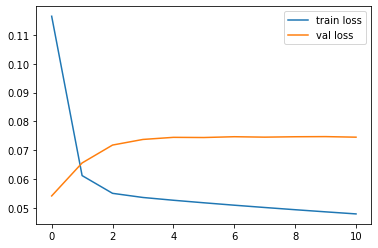

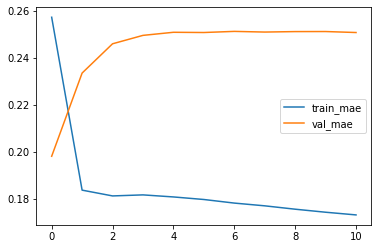

2/2 [==============================] - 0s 6ms/step - loss: 55799799808.0000 - mae: 206862.1719
mean squared error  [55799799808.0, 206862.171875]


In [ ]:
#dense_model

dense_model = tf.keras.Sequential([tf.keras.layers.Dense(512, activation=activation, input_shape=train_data.shape[1:]),
                                   tf.keras.layers.Dense(1)])


dense_model.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=metrics)

dense_model.summary()

history_dense_model = dense_model.fit(train_data_normalized,
                                      train_label_normalized,
                                      epochs=epoch,
                                      batch_size=batch_size,
                                      validation_data=(val_data_normalized, val_data_normalized),
                                      callbacks=callbacks)

plt.plot(history_dense_model.history['loss'], label='train loss')
plt.plot(history_dense_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history_dense_model.history['mae'], label='train_mae')
plt.plot(history_dense_model.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

mean_squared_error_test_dense_model = dense_model.evaluate(test_data, test_label, batch_size=batch_size)
print('mean squared error ', mean_squared_error_test_dense_model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              9216      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
17/17 [==============================] - 1s 31ms/step - loss: 3.1879 - mae: 1.3833 - val_loss: 1.6598 - val_mae: 0.9279 - lr: 0.0100
Epoch 2/500
17/17 [==============================] - 0s 23ms/step - loss: 1.3944 - mae: 0.8802 - val_loss: 1.2776 - val_mae: 0.8784 - lr: 0.0100
Epoch 3/500
17/17 [=====

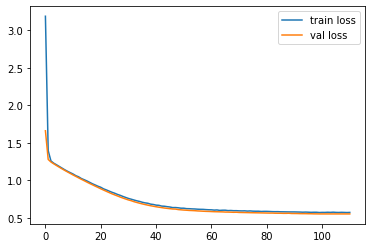

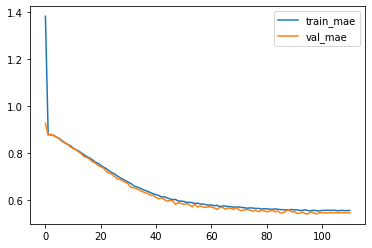

3/3 [==============================] - 0s 6ms/step - loss: 0.6097 - mae: 0.5882
mean squared error  [0.6096819043159485, 0.5882238745689392]


In [ ]:
#dense_model_with_dropout
dense_model_with_dropout = tf.keras.Sequential([tf.keras.layers.Dense(1024, activation=activation, input_shape=x_train.shape[1:]),
                                                tf.keras.layers.Dropout(dropout_rate),
                                                tf.keras.layers.Dense(1)])

dense_model_with_dropout.compile(loss=loss,
                                 optimizer=optimizer,
                                 metrics=metrics)

dense_model_with_dropout.summary()

history_dense_model_with_dropout = dense_model_with_dropout.fit(x_train,
                                                                y_train,
                                                                epochs=epoch,
                                                                batch_size=batch_size,
                                                                validation_data=(x_validation, y_validation),
                                                                callbacks=callbacks)

plt.plot(history_dense_model_with_dropout.history['loss'], label='train loss')
plt.plot(history_dense_model_with_dropout.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history_dense_model_with_dropout.history['mae'], label='train_mae')
plt.plot(history_dense_model_with_dropout.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

mean_squared_error_test_dense_model_with_dropout = dense_model_with_dropout.evaluate(x_test, y_test, batch_size=batch_size)
print('mean squared error ', mean_squared_error_test_dense_model_with_dropout)

# possible reasons as to why the validation statistics are better than training statistics: (https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/)
#R1 : Regularization applied during training, but not during validation/testing
#R2 : Training loss is measured during each epoch while validation loss is measured after each epoch
#R3 : The validation set may be easier than the training set

2064
Ground Truth  2.871
Dense model prediction  3.3162078857421875
Dense model with dropout prediction  3.3600211143493652
Ground Truth  1.741
Dense model prediction  1.8071658611297607
Dense model with dropout prediction  1.8451118469238281
Ground Truth  1.403
Dense model prediction  2.061087131500244
Dense model with dropout prediction  2.1110105514526367
Ground Truth  2.093
Dense model prediction  2.138805389404297
Dense model with dropout prediction  2.1839935779571533
Ground Truth  2.221
Dense model prediction  2.3240866661071777
Dense model with dropout prediction  2.3738224506378174
Ground Truth  3.527
Dense model prediction  3.4671573638916016
Dense model with dropout prediction  3.5282864570617676
Ground Truth  0.839
Dense model prediction  0.6085867285728455
Dense model with dropout prediction  0.6659692525863647
Ground Truth  1.301
Dense model prediction  1.656754970550537
Dense model with dropout prediction  1.674241542816162
Ground Truth  2.0
Dense model prediction  1.550

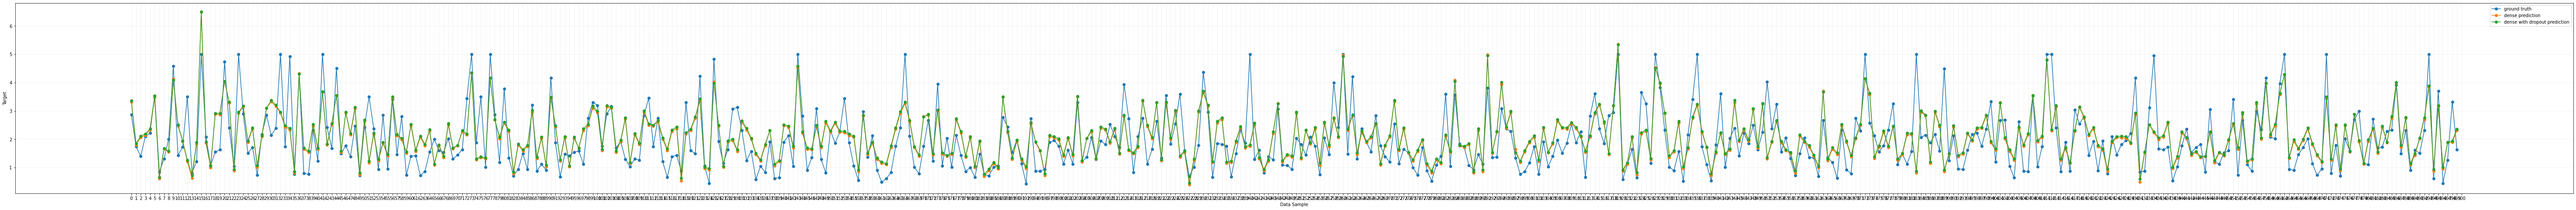

1/1 [==============================] - 0s 155ms/step - loss: 0.5857 - mae: 0.5721
Average error between gt and dense  [0.5856506824493408, 0.5720978379249573]
1/1 [==============================] - 0s 136ms/step - loss: 0.5977 - mae: 0.5874
Average error between gt and dense with dropout  [0.5977304577827454, 0.5873658657073975]


In [ ]:
number_of_testing_samples = 500
print(x_test.shape[0])
start_index = np.random.randint(0, x_test.shape[0]-250)

#indices_to_be_used_for_testing = sorted([random.randrange(1, x_test.shape[0], 1) for i in range(number_of_testing_samples)])

x_test_input = x_test[start_index:start_index+number_of_testing_samples]
y_ground_truth = y_test[start_index:start_index+number_of_testing_samples]

x_test_input = np.array(x_test_input)
y_ground_truth = np.array(y_ground_truth)

y_test_output_dense = dense_model.predict(x_test_input)
y_test_output_dense_with_dropout = dense_model_with_dropout.predict(x_test_input)

diff_gt_dense = []
diff_gt_dense_with_dropout = []

for i in range(len(x_test_input)):
    diff_gt_dense.append(y_ground_truth-y_test_output_dense)
    diff_gt_dense_with_dropout.append(y_ground_truth-y_test_output_dense_with_dropout)
    print('Ground Truth ', float(y_ground_truth[i]))
    print('Dense model prediction ', float(y_test_output_dense[i]))
    print('Dense model with dropout prediction ', float(y_test_output_dense_with_dropout[i]))

plt.figure(figsize=(105, 8))
plt.plot(y_ground_truth, marker='o', label='ground truth')
plt.grid('on', alpha=0.2)
plt.plot(y_test_output_dense, marker='o',  label='dense prediction')
plt.plot(y_test_output_dense_with_dropout, marker='o', label='dense with dropout prediction')

plt.legend()
plt.xticks(np.linspace(0, number_of_testing_samples, number_of_testing_samples+1))
plt.xlabel('Data Sample')
plt.ylabel('Target')
plt.show()

print('Average error between gt and dense ', dense_model.evaluate(x_test_input, y_ground_truth, batch_size=batch_size))
print('Average error between gt and dense with dropout ', dense_model_with_dropout.evaluate(x_test_input, y_ground_truth, batch_size=batch_size))

In [ ]:
#installing LIME explainer 
!pip install lime
import lime 
import lime.lime_tabular

In [ ]:
print(type(x_train))
print(x_train)
print(type(train_data))
print(train_data)
print(type(housing_dataset))
print(housing_dataset)

x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
#print('feature names ', housing_dataset.feature_names)
#print('target names ', housing_dataset.target_names)
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_np, feature_names=housing_dataset.feature_names, class_names=housing_dataset.target_names, discretize_continuous=True, mode='regression')

<class 'pandas.core.frame.DataFrame'>
       longitude  latitude  ...  households  median_income
0       0.296086  0.411765  ...    0.184910       0.594622
1       0.133012  0.647059  ...    0.136026       0.612550
2       0.121109  0.490196  ...    0.451647       0.454183
3       0.111150  1.000000  ...    0.155154       0.601594
4       0.281148  0.647059  ...    0.168969       0.609562
...          ...       ...  ...         ...            ...
16507   0.049461  1.000000  ...    0.561105       0.206175
16508   0.262934  0.882353  ...    0.137088       0.615538
16509   0.231528  0.647059  ...    0.167906       0.645418
16510   0.160853  0.764706  ...    0.279490       0.487052
16511   0.119088  0.470588  ...    0.170032       0.611554

[16512 rows x 8 columns]
<class 'numpy.ndarray'>
[[   4.7932       22.            5.29665072 ...    3.77033493
    34.28       -118.38      ]
 [   2.4286       34.            3.77284946 ...    2.97983871
    33.82       -118.2       ]
 [   2.256        

In [ ]:
i = np.random.randint(0, test.shape[0])
print(i)
#exp = explainer.explain_instance(x_test[i], dense_model.predict(x_test_input[i]), num_features=2, top_labels=1)

622


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
#Reference [general purpose] 
#https://www.kdnuggets.com/2020/01/explaining-black-box-models-ensemble-deep-learning-lime-shap.html
#https://medium.com/@gurupratap.matharu/end-to-end-machine-learning-project-on-predicting-housing-prices-using-regression-7ab7832840ab
#https://www.kaggle.com/mejbahahammad/building-a-regression-multi-layer-perceptron-mlp
#https://jmyao17.github.io/Kaggle/California_Housing_Prices.html
#https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

#EXPLORING LIME ON HOUSING DATASET
#https://www.katzentante.at/lime-on-regression-model-house-prices/ [Exploring lime on the house prices dataset]
#https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
#https://marcotcr.github.io/lime/tutorials/Using%2Blime%2Bfor%2Bregression.html

#Applying NN on CHD
#https://github.com/vineetver/California-housing-prediction-NN/blob/master/Neural%20Nets.ipynb

#REGRESSION USING MLP
#https://www.machinecurve.com/index.php/2019/07/30/creating-an-mlp-for-regression-with-keras/
#https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/
#https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression
#https://www.tensorflow.org/tutorials/keras/regression
# https://d2l.ai/chapter_multilayer-perceptrons/kaggle-house-price.html

#evaluating REGRESSION MODELS 
#https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=We%20cannot%20calculate%20accuracy%20for%20a%20regression%20model.&text=This%20makes%20sense%20if%20you%20think%20about%20it.&text=There%20are%20three%20error%20metrics,Mean%20Squared%20Error%20(RMSE).

